In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Data for Helium

The data frame 1 *data1* is for data when $P = 1 atm$

In [29]:
data1 = pd.read_csv("VT_he_data.csv")
data1["T(in Cº)"] = data1["T"] - 273.15
data1.style.set_caption("DATA FOR P=1ATM")

,#,P,V,T,n,T(in Cº)
0,1,1,0.210000,50,0.050000,-223.150000
1,2,1,0.330000,80,0.050000,-193.150000
2,3,1,0.450000,110,0.050000,-163.150000
3,4,1,0.570000,140,0.050000,-133.150000
4,5,1,0.700000,170,0.050000,-103.150000
5,6,1,0.840000,205,0.050000,-68.150000
6,7,1,1.030000,250,0.050000,-23.150000
7,8,1,1.230000,300,0.050000,26.850000
8,9,1,1.440000,350,0.050000,76.850000
9,10,1,1.640000,400,0.050000,126.850000


The data frame 2 *data2* is for data when $P = 2.5 atm$ and data 3 if for when $P = 0.5 atm$

In [30]:
data2 = pd.read_csv("VT_he_data2.csv")
data3 = pd.read_csv("VT_he_data3.csv")
data2["T(in Cº)"] = data2["T"] - 273.15
data3["T(in Cº)"] = data3["T"] - 273.15
data2.style.set_caption("DATA FOR P=2.5ATM")

,#,P,V,T,n,T(in Cº)
0,1,2.500000,0.080000,50,0.050000,-223.150000
1,2,2.500000,0.130000,80,0.050000,-193.150000
2,3,2.500000,0.180000,110,0.050000,-163.150000
3,4,2.500000,0.230000,140,0.050000,-133.150000
4,5,2.500000,0.280000,170,0.050000,-103.150000
5,6,2.500000,0.340000,205,0.050000,-68.150000
6,7,2.500000,0.410000,250,0.050000,-23.150000
7,8,2.500000,0.490000,300,0.050000,26.850000
8,9,2.500000,0.570000,350,0.050000,76.850000
9,10,2.500000,0.660000,400,0.050000,126.850000


In [31]:
data3.style.set_caption("DATA FOR P=0.5ATM")

,#,P,V,T,n,T(in Cº)
0,1,0.500000,0.410000,50,0.050000,-223.150000
1,2,0.500000,0.660000,80,0.050000,-193.150000
2,3,0.500000,0.900000,110,0.050000,-163.150000
3,4,0.500000,1.150000,140,0.050000,-133.150000
4,5,0.500000,1.400000,170,0.050000,-103.150000
5,6,0.500000,1.680000,205,0.050000,-68.150000
6,7,0.500000,2.050000,250,0.050000,-23.150000
7,8,0.500000,2.460000,300,0.050000,26.850000
8,9,0.500000,2.870000,350,0.050000,76.850000
9,10,0.500000,3.280000,400,0.050000,126.850000


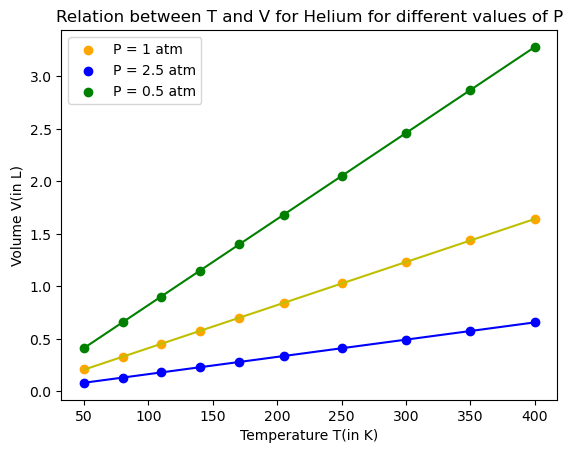

In [5]:
plt.scatter(data1["T"], data1["V"], c = "orange", label="P = 1 atm")
plt.scatter(data2["T"], data2["V"], c = "blue", label="P = 2.5 atm")
plt.scatter(data3["T"], data3["V"], c = "green", label="P = 0.5 atm")
plt.title("Relation between T and V for Helium for different values of P")
plt.xlabel("Temperature T(in K)")
plt.ylabel("Volume V(in L)")
plt.legend(loc="upper left")


#adding the trend lines
z1 = np.polyfit(data1["T"], data1["V"], 1)
p1 = np.poly1d(z1)
plt.plot(data1["T"], p1(data1["T"]), "y")

z2 = np.polyfit(data2["T"], data2["V"], 1)
p2 = np.poly1d(z2)
plt.plot(data2["T"], p2(data2["T"]), "b")

z3 = np.polyfit(data3["T"], data3["V"], 1)
p3 = np.poly1d(z3)
plt.plot(data3["T"], p3(data3["T"]), "g")
#plt.gcf().set_size_inches((5, 5))  
plt.show()

### Equations of the lines above for T in K

In [6]:
x1 = np.array(data1["T"]).reshape(-1, 1)
y1 = np.array(data1["V"])

lr1 = LinearRegression()
lr1.fit(x1, y1)

coeff1 = lr1.coef_
inter1 = lr1.intercept_
# used for the trend line with y = coeff*x + inter
print(f"Slope: {coeff1}")
print(f"Intercept: {inter1}")#to be ignored
print(f"equation fo the line when P = 1 atm: y = {coeff1[0] - coeff1[0]%0.000001}x + ({inter1 - inter1%0.01})")
print(f"R^2: {r2_score(y1, coeff1*x1 + inter1)} \n")

x2 = np.array(data2["T"]).reshape(-1, 1)
y2 = np.array(data2["V"])

lr2 = LinearRegression()
lr2.fit(x2, y2)

coeff2 = lr2.coef_
inter2 = lr2.intercept_
# used for the trend line with y = coeff*x + inter
print(f"Slope: {coeff2}")
print(f"Intercept: {inter2}")#to be ignored
print(f"equation fo the line when P = 2.5 atm: y = {coeff2[0] - coeff2[0]%0.000001}x + ({inter2 - inter2%0.01})")
print(f"R^2: {r2_score(y2, coeff2*x2 + inter2)} \n")

x3 = np.array(data3["T"]).reshape(-1, 1)
y3 = np.array(data3["V"])

lr3 = LinearRegression()
lr3.fit(x3, y3)

coeff3 = lr3.coef_
inter3 = lr3.intercept_
# used for the trend line with y = coeff*x + inter
print(f"Slope: {coeff3}")
print(f"Intercept: {inter3}")#to be ignored
print(f"equation fo the line when P = 0.5 atm: y = {coeff3[0] - coeff3[0]%0.000001}x + ({inter3 - inter3%0.01})")
print(f"R^2: {r2_score(y3, coeff3*x3 + inter3)}")

Slope: [0.00410135]
Intercept: 0.0011724929058745115
equation fo the line when P = 1 atm: y = 0.004101x + (0.0)
R^2: 0.9999598024202798 

Slope: [0.00164354]
Intercept: -0.0007480528889692861
equation fo the line when P = 2.5 atm: y = 0.001643x + (-0.01)
R^2: 0.9998329108260136 

Slope: [0.00819473]
Intercept: 0.0019827325967527454
equation fo the line when P = 0.5 atm: y = 0.008194x + (0.0)
R^2: 0.9999940720029055


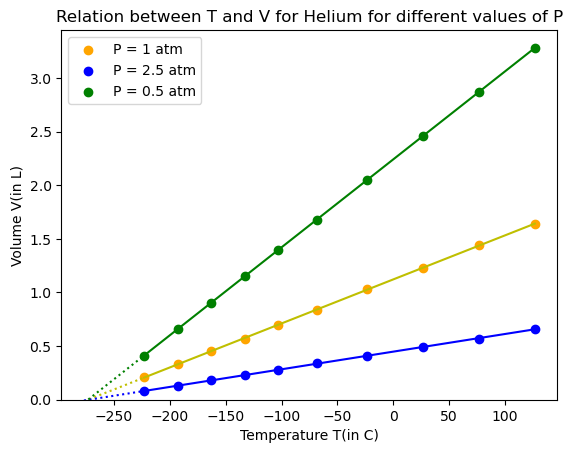

In [7]:
plt.scatter(data1["T(in Cº)"], data1["V"], c = "orange", label="P = 1 atm")
plt.scatter(data2["T(in Cº)"], data2["V"], c = "blue", label="P = 2.5 atm")
plt.scatter(data3["T(in Cº)"], data3["V"], c = "green", label="P = 0.5 atm")
plt.title("Relation between T and V for Helium for different values of P")
plt.xlabel("Temperature T(in C)")
plt.ylabel("Volume V(in L)")
plt.legend(loc="upper left")


#adding the trend lines and extrapolated lines
z1 = np.polyfit(data1["T(in Cº)"], data1["V"], 1)
p1 = np.poly1d(z1)
plt.plot(data1["T(in Cº)"], p1(data1["T(in Cº)"]), "y")
x = np.linspace(-277, -223.15, 100)
poly = np.polyfit(data1["T(in Cº)"], data1["V"], deg=1)
y_int  = np.polyval(poly, x)
plt.plot(x, y_int, "y", linestyle = 'dotted')

z2 = np.polyfit(data2["T(in Cº)"], data2["V"], 1)
p2 = np.poly1d(z2)
plt.plot(data2["T(in Cº)"], p2(data2["T(in Cº)"]), "b")
x2 = np.linspace(-277, -223.15, 100)
poly2 = np.polyfit(data2["T(in Cº)"], data2["V"], deg=1)
y_int2  = np.polyval(poly2, x2)
plt.plot(x2, y_int2, "b", linestyle = 'dotted')

z3 = np.polyfit(data3["T(in Cº)"], data3["V"], 1)
p3 = np.poly1d(z3)
plt.plot(data3["T(in Cº)"], p3(data3["T(in Cº)"]), "g")
x3 = np.linspace(-277, -223.15, 100)
poly3 = np.polyfit(data3["T(in Cº)"], data3["V"], deg=1)
y_int3  = np.polyval(poly3, x3)
plt.plot(x3, y_int3, "g", linestyle = 'dotted')
#plt.gcf().set_size_inches((5, 5))
plt.ylim(ymin=0)
plt.show()

### The Equations of the 3 lines for T in C

In [8]:
x1 = np.array(data1["T(in Cº)"]).reshape(-1, 1)
y1 = np.array(data1["V"])

lr1 = LinearRegression()
lr1.fit(x1, y1)

coeff1 = lr1.coef_
inter1 = lr1.intercept_
# used for the trend line with y = coeff*x + inter
print(f"Slope: {coeff1}")
print(f"Intercept: {inter1}")#to be ignored
print(f"equation fo the line when P = 1 atm: y = {coeff1[0] - coeff1[0]%0.000001}x + ({inter1 - inter1%0.01})")
print(f"R^2: {r2_score(y1, coeff1*x1 + inter1)} \n")

x2 = np.array(data2["T(in Cº)"]).reshape(-1, 1)
y2 = np.array(data2["V"])

lr2 = LinearRegression()
lr2.fit(x2, y2)

coeff2 = lr2.coef_
inter2 = lr2.intercept_
# used for the trend line with y = coeff*x + inter
print(f"Slope: {coeff2}")
print(f"Intercept: {inter2}")#to be ignored
print(f"equation fo the line when P = 2.5 atm: y = {coeff2[0] - coeff2[0]%0.000001}x + ({inter2 - inter2%0.01})")
print(f"R^2: {r2_score(y2, coeff2*x2 + inter2)} \n")

x3 = np.array(data3["T(in Cº)"]).reshape(-1, 1)
y3 = np.array(data3["V"])

lr3 = LinearRegression()
lr3.fit(x3, y3)

coeff3 = lr3.coef_
inter3 = lr3.intercept_
# used for the trend line with y = coeff*x + inter
print(f"Slope: {coeff3}")
print(f"Intercept: {inter3}")#to be ignored
print(f"equation fo the line when P = 0.5 atm: y = {coeff3[0] - coeff3[0]%0.000001}x + ({inter3 - inter3%0.01})")
print(f"R^2: {r2_score(y3, coeff3*x3 + inter3)}")

Slope: [0.00410135]
Intercept: 1.1214563545251464
equation fo the line when P = 1 atm: y = 0.004101x + (1.12)
R^2: 0.9999598024202798 

Slope: [0.00164354]
Intercept: 0.44818567288534683
equation fo the line when P = 2.5 atm: y = 0.001643x + (0.44)
R^2: 0.9998329108260136 

Slope: [0.00819473]
Intercept: 2.2403735675904124
equation fo the line when P = 0.5 atm: y = 0.008194x + (2.24)
R^2: 0.9999940720029055


## Data for Neon

The data frame 1 *data1* is for data when $P = 1 atm$

In [34]:
data1 = pd.read_csv("VT_ne_data1.csv")
data1["T(in Cº)"] = data1["T"] - 273.15
data1.style.set_caption("DATA FOR P=1ATM")

,#,P,V,T,n,T(in Cº)
0,1,1,0.210000,50,0.050000,-223.150000
1,2,1,0.330000,80,0.050000,-193.150000
2,3,1,0.450000,110,0.050000,-163.150000
3,4,1,0.570000,140,0.050000,-133.150000
4,5,1,0.700000,170,0.050000,-103.150000
5,6,1,0.840000,205,0.050000,-68.150000
6,7,1,1.030000,250,0.050000,-23.150000
7,8,1,1.230000,300,0.050000,26.850000
8,9,1,1.440000,350,0.050000,76.850000
9,10,1,1.640000,400,0.050000,126.850000


The data frame 2 *data2* is for data when $P = 2.5 atm$ and data 3 if for when $P = 0.5 atm$

In [33]:
data2 = pd.read_csv("VT_ne_data2.csv")
data3 = pd.read_csv("VT_ne_data3.csv")
data2["T(in Cº)"] = data2["T"] - 273.15
data3["T(in Cº)"] = data3["T"] - 273.15
data2.style.set_caption("DATA FOR P=2.5ATM")

,#,P,V,T,n,T(in Cº)
0,1,2.500000,0.080000,50,0.050000,-223.150000
1,2,2.500000,0.130000,80,0.050000,-193.150000
2,3,2.500000,0.180000,110,0.050000,-163.150000
3,4,2.500000,0.230000,140,0.050000,-133.150000
4,5,2.500000,0.280000,170,0.050000,-103.150000
5,6,2.500000,0.340000,205,0.050000,-68.150000
6,7,2.500000,0.410000,250,0.050000,-23.150000
7,8,2.500000,0.490000,300,0.050000,26.850000
8,9,2.500000,0.570000,350,0.050000,76.850000
9,10,2.500000,0.660000,400,0.050000,126.850000


In [32]:
data3.style.set_caption("DATA FOR P=0.5ATM")

,#,P,V,T,n,T(in Cº)
0,1,0.500000,0.410000,50,0.050000,-223.150000
1,2,0.500000,0.660000,80,0.050000,-193.150000
2,3,0.500000,0.900000,110,0.050000,-163.150000
3,4,0.500000,1.150000,140,0.050000,-133.150000
4,5,0.500000,1.400000,170,0.050000,-103.150000
5,6,0.500000,1.680000,205,0.050000,-68.150000
6,7,0.500000,2.050000,250,0.050000,-23.150000
7,8,0.500000,2.460000,300,0.050000,26.850000
8,9,0.500000,2.870000,350,0.050000,76.850000
9,10,0.500000,3.280000,400,0.050000,126.850000


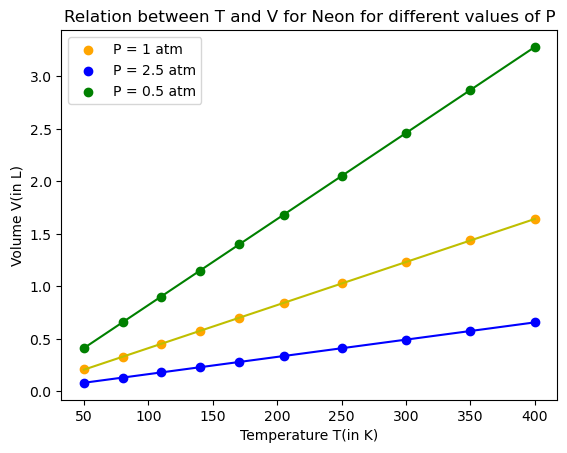

In [17]:
plt.scatter(data1["T"], data1["V"], c = "orange", label="P = 1 atm")
plt.scatter(data2["T"], data2["V"], c = "blue", label="P = 2.5 atm")
plt.scatter(data3["T"], data3["V"], c = "green", label="P = 0.5 atm")
plt.title("Relation between T and V for Neon for different values of P")
plt.xlabel("Temperature T(in K)")
plt.ylabel("Volume V(in L)")
plt.legend(loc="upper left")

#adding the trend lines
z1 = np.polyfit(data1["T"], data1["V"], 1)
p1 = np.poly1d(z1)
plt.plot(data1["T"], p1(data1["T"]), "y")

z2 = np.polyfit(data2["T"], data2["V"], 1)
p2 = np.poly1d(z2)
plt.plot(data2["T"], p2(data2["T"]), "b")

z3 = np.polyfit(data3["T"], data3["V"], 1)
p3 = np.poly1d(z3)
plt.plot(data3["T"], p3(data3["T"]), "g")
#plt.gcf().set_size_inches((5, 5))  
plt.show()

### Equations of the lines above

In [18]:
x1 = np.array(data1["T"]).reshape(-1, 1)
y1 = np.array(data1["V"])

lr1 = LinearRegression()
lr1.fit(x1, y1)

coeff1 = lr1.coef_
inter1 = lr1.intercept_
# used for the trend line with y = coeff*x + inter
print(f"Slope: {coeff1}")
print(f"Intercept: {inter1}")#to be ignored
print(f"equation fo the line when P = 1 atm: y = {coeff1[0] - coeff1[0]%0.000001}x + ({inter1 - inter1%0.01})")
print(f"R^2: {r2_score(y1, coeff1*x1 + inter1)} \n")

x2 = np.array(data2["T"]).reshape(-1, 1)
y2 = np.array(data2["V"])

lr2 = LinearRegression()
lr2.fit(x2, y2)

coeff2 = lr2.coef_
inter2 = lr2.intercept_
# used for the trend line with y = coeff*x + inter
print(f"Slope: {coeff2}")
print(f"Intercept: {inter2}")#to be ignored
print(f"equation fo the line when P = 2.5 atm: y = {coeff2[0] - coeff2[0]%0.000001}x + ({inter2 - inter2%0.01})")
print(f"R^2: {r2_score(y2, coeff2*x2 + inter2)} \n")

x3 = np.array(data3["T"]).reshape(-1, 1)
y3 = np.array(data3["V"])

lr3 = LinearRegression()
lr3.fit(x3, y3)

coeff3 = lr3.coef_
inter3 = lr3.intercept_
# used for the trend line with y = coeff*x + inter
print(f"Slope: {coeff3}")
print(f"Intercept: {inter3}")#to be ignored
print(f"equation fo the line when P = 0.5 atm: y = {coeff3[0] - coeff3[0]%0.000001}x + ({inter3 - inter3%0.01})")
print(f"R^2: {r2_score(y3, coeff3*x3 + inter3)}")

Slope: [0.00410135]
Intercept: 0.0011724929058745115
equation fo the line when P = 1 atm: y = 0.004101x + (0.0)
R^2: 0.9999598024202798 

Slope: [0.00164354]
Intercept: -0.0007480528889692861
equation fo the line when P = 2.5 atm: y = 0.001643x + (-0.01)
R^2: 0.9998329108260136 

[0.45514657]
Slope: [0.00819473]
Intercept: 0.0019827325967527454
equation fo the line when P = 0.5 atm: y = 0.008194x + (0.0)
R^2: 0.9999940720029055


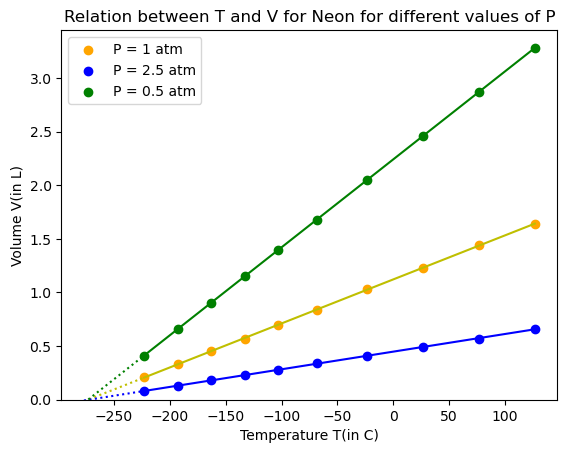

In [35]:
plt.scatter(data1["T(in Cº)"], data1["V"], c = "orange", label="P = 1 atm")
plt.scatter(data2["T(in Cº)"], data2["V"], c = "blue", label="P = 2.5 atm")
plt.scatter(data3["T(in Cº)"], data3["V"], c = "green", label="P = 0.5 atm")
plt.title("Relation between T and V for Neon for different values of P")
plt.xlabel("Temperature T(in C)")
plt.ylabel("Volume V(in L)")
plt.legend(loc="upper left")

#adding the trend lines and extrapolated lines
z1 = np.polyfit(data1["T(in Cº)"], data1["V"], 1)
p1 = np.poly1d(z1)
plt.plot(data1["T(in Cº)"], p1(data1["T(in Cº)"]), "y")
x = np.linspace(-277, -223.15, 100)
poly = np.polyfit(data1["T(in Cº)"], data1["V"], deg=1)
y_int  = np.polyval(poly, x)
plt.plot(x, y_int, "y", linestyle = 'dotted')

z2 = np.polyfit(data2["T(in Cº)"], data2["V"], 1)
p2 = np.poly1d(z2)
plt.plot(data2["T(in Cº)"], p2(data2["T(in Cº)"]), "b")
x2 = np.linspace(-277, -223.15, 100)
poly2 = np.polyfit(data2["T(in Cº)"], data2["V"], deg=1)
y_int2  = np.polyval(poly2, x2)
plt.plot(x2, y_int2, "b", linestyle = 'dotted')

z3 = np.polyfit(data3["T(in Cº)"], data3["V"], 1)
p3 = np.poly1d(z3)
plt.plot(data3["T(in Cº)"], p3(data3["T(in Cº)"]), "g")
x3 = np.linspace(-277, -223.15, 100)
poly3 = np.polyfit(data3["T(in Cº)"], data3["V"], deg=1)
y_int3  = np.polyval(poly3, x3)
plt.plot(x3, y_int3, "g", linestyle = 'dotted')
#plt.gcf().set_size_inches((5, 5))
plt.ylim(ymin=0)
plt.show()

### Equations of the lines above

In [25]:
x1 = np.array(data1["T(in Cº)"]).reshape(-1, 1)
y1 = np.array(data1["V"])

lr1 = LinearRegression()
lr1.fit(x1, y1)

coeff1 = lr1.coef_
inter1 = lr1.intercept_
# used for the trend line with y = coeff*x + inter
print(f"Slope: {coeff1}")
print(f"Intercept: {inter1}")#to be ignored
print(f"equation fo the line when P = 1 atm: y = {coeff1[0] - coeff1[0]%0.000001}x + ({inter1 - inter1%0.001})")
print(f"R^2: {r2_score(y1, coeff1*x1 + inter1)} \n")

x2 = np.array(data2["T(in Cº)"]).reshape(-1, 1)
y2 = np.array(data2["V"])

lr2 = LinearRegression()
lr2.fit(x2, y2)

coeff2 = lr2.coef_
inter2 = lr2.intercept_
# used for the trend line with y = coeff*x + inter
print(f"Slope: {coeff2}")
print(f"Intercept: {inter2}")#to be ignored
print(f"equation fo the line when P = 2.5 atm: y = {coeff2[0] - coeff2[0]%0.000001}x + ({inter2 - inter2%0.0001})")
print(f"R^2: {r2_score(y2, coeff2*x2 + inter2)} \n")

x3 = np.array(data3["T(in Cº)"]).reshape(-1, 1)
y3 = np.array(data3["V"])

lr3 = LinearRegression()
lr3.fit(x3, y3)

coeff3 = lr3.coef_
inter3 = lr3.intercept_
# used for the trend line with y = coeff*x + inter
print(f"Slope: {coeff3}")
print(f"Intercept: {inter3}")#to be ignored
print(f"equation fo the line when P = 0.5 atm: y = {coeff3[0] - coeff3[0]%0.000001}x + ({inter3 - inter3%0.001})")
print(f"R^2: {r2_score(y3, coeff3*x3 + inter3)}")
print("x-intercept (computed using the line of the equation): {}".format(-inter3/(coeff3[0])))

Slope: [0.00410135]
Intercept: 1.1214563545251464
equation fo the line when P = 1 atm: y = 0.004101x + (1.121)
R^2: 0.9999598024202798 

Slope: [0.00164354]
Intercept: 0.44818567288534683
equation fo the line when P = 2.5 atm: y = 0.001643x + (0.4481)
R^2: 0.9998329108260136 

Slope: [0.00819473]
Intercept: 2.2403735675904124
equation fo the line when P = 0.5 atm: y = 0.008194x + (2.24)
R^2: 0.9999940720029055
x-intercept (computed using the line of the equation): -273.3919521203966
